<!DOCTYPE html>
<html>
<head>
    <style>
        .center-image {
            display: block;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <img src="https://th.bing.com/th/id/OIP.18EZOYy8eAuoeZwXcmCUGQAAAA?rs=1&pid=ImgDetMain" alt="Logo" class="center-image">
</body>

Este Notebook tiene como objetivo realizar una evaluación de la integridad de las bases de datos proporcionadas por BGH. Esta evaluación se fundamenta en un marco teórico que asegura la integridad necesaria para un análisis adecuado. Dicho marco teórico responde a las necesidades corporativas de la empresa. A lo largo de este Notebook, se evaluarán las diferentes bases que sustentan un análisis de datos de calidad.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
# Configuro pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

Cargamos las bases de datos, las cuales fueron almacenadas en una base de datos SQL de manera local. Esto nos permite realizar análisis más rápidos y establecer una conexión correcta con Power BI y Python, considerando las dimensiones de las diversas tablas proporcionadas por BGH.

In [2]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd

# Configuración de la conexión
conexion_config = {
    'user': 'root',
    'password': 'Ayla2022',
    'host': 'localhost',
    'port': 3306,
    'database': 'bgh' 
}

# Crear el engine con SQLAlchemy
conexion_str = f"mysql+mysqlconnector://{conexion_config['user']}:{conexion_config['password']}@{conexion_config['host']}:{conexion_config['port']}/{conexion_config['database']}"
engine = create_engine(conexion_str)

# Lista de nombres de tablas
nombres_tablas = [
    'acuerdos_clientes',
    'base_ventas_historica',
    'forecast_octubre_2024',
    'precios_pvp',
    'tasas',
    'ventas_diarias'
]

# Cargar cada tabla como un DataFrame individual
for tabla in nombres_tablas:
    df = pd.read_sql(f"SELECT * FROM {tabla}", engine)
    globals()[tabla] = df  # Asigno el DataFrame a una variable con el nombre de la tabla
    print(f"Tabla '{tabla}' cargada como DataFrame. Primeras filas:\n", df.head())



Tabla 'acuerdos_clientes' cargada como DataFrame. Primeras filas:
    Cliente          MARCA   Cliente Descripcion  \
0   INC-TV             TV  INC SOCIEDAD ANONIMA   
1  INC-CMO            CMO  INC SOCIEDAD ANONIMA   
2   INC-HE             HE  INC SOCIEDAD ANONIMA   
3   INC-AA            AAI  INC SOCIEDAD ANONIMA   
4   INC-TT  Aguasanitaria  INC SOCIEDAD ANONIMA   

               Cliente Descripcion 2 Ac Comercial  Ac Logistico      EA  D24  \
0             TVINC SOCIEDAD ANONIMA         None        0.0400  0.0029  NaN   
1            CMOINC SOCIEDAD ANONIMA         None        0.0284  0.0029  NaN   
2             HEINC SOCIEDAD ANONIMA         None        0.0347  0.0029  NaN   
3            AAIINC SOCIEDAD ANONIMA         None        0.0347  0.0029  NaN   
4  AguasanitariaINC SOCIEDAD ANONIMA         None        0.0347  0.0029  NaN   

    TOTAL  
0  0.0029  
1  0.0029  
2  0.0029  
3  0.0029  
4  0.0029  
Tabla 'base_ventas_historica' cargada como DataFrame. Primeras filas:
   

In [3]:
ventas_diarias

,Creado el,Nombre Vendedor,Solicitante,Material,Número de material,ValorNeto,Precio Unitario,Fecha Fectura,Cant. Fact,Ctd.conf.pend,Cantidad en Back Order,Back Order por créditos,Cantidad en Back Order C o P,Tipo de venta,Línea,Línea OEM,AA,Retención,Canal,Marca,BO TOTAL,Valor Facturado,Valor liberado,Valor Neto Pend,Valor Neto Retenido,Valor BO,control,Condición de pago - desc
0,2023-07-11,Mario Marigliano,CASTILLO SACIFIA,PNH048303,HORNO ELEC BGH BHE55M19N,-85165.29,28388.43,NaT,0,-3,0,0,0,Spot,HE,HE,-,Liberado,Retail Especializado,BGH,0,0.0,-85165.29,-85165.29,0.0,0.00,0.00,Pago 60 días Fecha Factura
1,2023-07-11,Mario Marigliano,CASTILLO SACIFIA,PNH048317,HORNO ELEC BGH BHE64M20AN,-351059.50,39006.61,NaT,0,-9,0,0,0,Spot,HE,HE,-,Liberado,Retail Especializado,BGH,0,0.0,-351059.49,-351059.49,0.0,0.00,0.01,Pago 60 días Fecha Factura
2,2023-07-11,Mario Marigliano,CASTILLO SACIFIA,PNH048316,HORNO ELEC BGH BHE65M19N,-33095.87,33095.87,NaT,0,-1,0,0,0,Spot,HE,HE,-,Liberado,Retail Especializado,BGH,0,0.0,-33095.87,-33095.87,0.0,0.00,0.00,Pago 60 días Fecha Factura
3,2023-07-11,Mario Marigliano,CASTILLO SACIFIA,PNH048315,HE AURORA KANKAY M55.3,-24380.17,24380.17,NaT,0,-1,0,0,0,Spot,HE,HE OEM,-,Liberado,Retail Especializado,None,0,0.0,-24380.17,-24380.17,0.0,0.00,0.00,Pago 60 días Fecha Factura
4,2024-01-22,Juan Manuel Nuñez,CASA SILVIA S.A,PNE040253,"TV 43"" BGH LED B4321FH5A",-254710.75,127355.38,NaT,0,-2,0,0,0,Spot,TV,TV,-,Liberado,Grupo de Compras,BGH,0,0.0,-254710.76,-254710.76,0.0,0.00,-0.01,Pago 60 días Fecha Factura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,2024-09-26,None,REAL COLOR SRL,PIH034064,LAVARROPAS BGH BWFI06S24AR -INV 6KG SILV,42532.56,168.78,NaT,0,0,252,0,0,FOB,Lavado,Lavado,-,Liberado,Otros Retails,None,252,0.0,0.00,0.00,0.0,42532.56,0.00,Pago 90 días Fecha Factura
3845,2024-09-26,None,REAL COLOR SRL,PIH034059,LAVARROPAS BGH BWFI08S24AR 8 KG DRK SILV,47549.40,221.16,NaT,0,0,215,0,0,FOB,Lavado,Lavado,-,Liberado,Otros Retails,None,215,0.0,0.00,0.00,0.0,47549.40,0.00,Pago 90 días Fecha Factura
3846,2024-10-04,None,START.AR SA,PIH034059,LAVARROPAS BGH BWFI08S24AR 8 KG DRK SILV,98040.00,228.00,NaT,0,0,430,0,0,FOB,Lavado,Lavado,-,Liberado,Otros Retails,None,430,0.0,0.00,0.00,0.0,98040.00,0.00,50% a 90 y 50% a 120 d. FF
3847,2024-10-04,None,START.AR SA,PIH034064,LAVARROPAS BGH BWFI06S24AR -INV 6KG SILV,43848.00,174.00,NaT,0,0,252,0,0,FOB,Lavado,Lavado,-,Liberado,Otros Retails,None,252,0.0,0.00,0.00,0.0,43848.00,0.00,50% a 90 y 50% a 120 d. FF


Lo primero que realizaremos será filtrar la base de ventas diarias, eliminando los valores iguales a '-' en la columna AA (aires acondicionados). Esta columna tiene dos posibles valores: '-' y 'HIJOS'. Los valores correspondientes a 'HIJOS' representan una única venta, pero se generan registros duplicados para las distintas partes del aire acondicionado (condensadora y evaporadora).

Una vez filtrada nuestra tabla, procederemos a realizar una comparación de valores únicos entre dos columnas de distintas tablas:

Ventas Diarias: Esta base contiene el seguimiento de las ventas diarias de la empresa BGH.

Forecast_octubre_2024: Esta base incluye información sobre la proyección de ventas, la cual se realizó por SKU (código único de producto) y se desagrega por atributos de ventas, como por ejemplo: SPOT, que corresponde a una venta no programada; PROG, que se refiere a una venta previamente programada; y D2C, que es un tipo de venta directa al público sin intermediarios. Además, cabe destacar que la base contiene información tanto en unidades vendidas como en facturación.

A continuación, analizaremos lo siguiente: dado que uno de los objetivos del tablero de Power BI es comparar la venta diaria con la venta proyectada para evaluar el rendimiento, el marco teórico sugiere la hipótesis de que la proyección (forecast) está hecha para cada uno de los artículos que pueden ser vendidos. Por lo tanto, tomaremos todos los valores únicos de la columna "Material" de la tabla de ventas diarias y evaluaremos si cada uno de esos valores se encuentra en la columna "CODIGOSAP" de la tabla de forecast. Esta hipótesis debería ser correcta, ya que de esta manera podremos comparar todas las ventas diarias con su correspondiente proyección. De lo contrario, si descartamos esta hipótesis, podemos inferir que no todos los artículos que pueden ser vendidos diariamente pueden ser comparados con su proyección mensual.

In [4]:
# Filtro ventas_diarias donde la columna 'AA' sea igual a '-'
ventas_filtradas = ventas_diarias[ventas_diarias['AA'] == '-']

# Ahora que tengo ventas_diarias filtrado.
# Verifico si los valores de 'Material' en ventas_filtradas están en 'CÓDIGOSAP'

# 1. Verifico si todos los valores de ventas_filtradas['Material'] están en forecast_octubre_2024['CÓDIGOSAP']
todos_en_forecast = ventas_filtradas['Material'].isin(forecast_octubre_2024['CÓDIGOSAP'])

# 2. Calculo el porcentaje de valores únicos de ventas_filtradas['Material'] que están en forecast_octubre_2024['CÓDIGOSAP']
valores_unicos_material = ventas_filtradas['Material'].unique()
valores_unicos_en_forecast = valores_unicos_material[
    pd.Series(valores_unicos_material).isin(forecast_octubre_2024['CÓDIGOSAP'])
]

# Porcentaje de valores únicos que coinciden
porcentaje_coincidencia = len(valores_unicos_en_forecast) / len(valores_unicos_material) * 100

# Resultados corregidos
print(f"¿Todos los valores de 'Material' están en 'CÓDIGOSAP'? {'Sí' if todos_en_forecast.all() else 'No'}")
print(f"Porcentaje de valores únicos de 'Material' que coinciden en 'CÓDIGOSAP': {porcentaje_coincidencia:.2f}%")


¿Todos los valores de 'Material' están en 'CÓDIGOSAP'? No
Porcentaje de valores únicos de 'Material' que coinciden en 'CÓDIGOSAP': 32.24%


**Conclusión:** <span style="color:green">Como puede observarse, solo el 32% de los productos vendidos tienen su proyección, lo que dificulta la comparación entre la proyección y la venta real.</span>


Ahora realizaremos la comparación entre dos tablas:

1. **Ventas Diarias**
2. **Acuerdos Clientes**

La base de **Acuerdos Clientes** contiene distintos acuerdos de tipo cliente y producto, así como su porcentaje total. Estos acuerdos responden a diversas negociaciones comerciales ya pactadas.

Lo que haremos será una comparación para observar qué porcentaje de los clientes que aparecen en las ventas diarias están incluidos en la base de clientes con acuerdos comerciales. Luego, dentro de estas coincidencias, examinaremos qué productos han sido vendidos y cuáles están disponibles para estos clientes bajo acuerdo.

In [5]:
# Normalizo los valores de las columnas eliminando espacios en blanco utilizando .loc
ventas_filtradas.loc[:, 'Línea'] = ventas_filtradas['Línea'].str.strip()
ventas_filtradas.loc[:, 'Solicitante'] = ventas_filtradas['Solicitante'].str.strip()
acuerdos_clientes.loc[:, 'MARCA'] = acuerdos_clientes['MARCA'].str.strip()
acuerdos_clientes.loc[:, 'Cliente Descripcion'] = acuerdos_clientes['Cliente Descripcion'].str.strip()

# Creo combinaciones de 'Solicitante' y 'Línea'
ventas_combinadas = ventas_filtradas[['Solicitante', 'Línea']].drop_duplicates()
ventas_combinadas['combinacion'] = ventas_combinadas['Solicitante'] + ' - ' + ventas_combinadas['Línea']

# Creo combinaciones de 'Cliente Descripcion' y 'MARCA'
acuerdos_combinados = acuerdos_clientes[['Cliente Descripcion', 'MARCA']].drop_duplicates()
acuerdos_combinados['combinacion'] = acuerdos_combinados['Cliente Descripcion'] + ' - ' + acuerdos_combinados['MARCA']

# 1. Verifico si todas las combinaciones de 'Solicitante' y 'Línea' están en las combinaciones de 'Cliente Descripcion' y 'MARCA'
todos_en_acuerdos = ventas_combinadas['combinacion'].isin(acuerdos_combinados['combinacion'])

# 2. Calculo el porcentaje de combinaciones únicas de 'Solicitante' y 'Línea' que están en 'Cliente Descripcion' y 'MARCA'
valores_unicos_combinados = ventas_combinadas['combinacion'].unique()
valores_unicos_en_acuerdos = valores_unicos_combinados[pd.Series(valores_unicos_combinados).isin(acuerdos_combinados['combinacion'])]

# Porcentaje de combinaciones únicas que coinciden
porcentaje_coincidencia_combinada = len(valores_unicos_en_acuerdos) / len(valores_unicos_combinados) * 100

# Resultados de la comparación
print(f"¿Todas las combinaciones de 'Solicitante' y 'Línea' están en las combinaciones de 'Cliente Descripcion' y 'MARCA'? {'Sí' if todos_en_acuerdos.all() else 'No'}")
print(f"Porcentaje de combinaciones únicas de 'Solicitante' y 'Línea' que coinciden en 'Cliente Descripcion' y 'MARCA': {porcentaje_coincidencia_combinada:.2f}%")



¿Todas las combinaciones de 'Solicitante' y 'Línea' están en las combinaciones de 'Cliente Descripcion' y 'MARCA'? No
Porcentaje de combinaciones únicas de 'Solicitante' y 'Línea' que coinciden en 'Cliente Descripcion' y 'MARCA': 1.57%


**Conclusión:** 

<span style="color:green">Como podemos observar, al analizar el porcentaje de coincidencia entre clientes y productos en las ventas, solo el 1.22% de todos los datos de ventas diarias está sujeto al acuerdo comercial. Es importante recordar que esta condición debe cumplirse tanto para el cliente como para el artículo.</span>


**Intervalo de Tiempo**

Ahora tomaremos dos columnas que contienen información de tiempo de la base de ventas filtradas. Las columnas son **'Fecha Factura'** y **'Fecha Creado'**. La columna **'Fecha Factura'** puede corresponder a un tipo de venta programada, es decir, puede ser la fecha en la que se realizó el pedido y la fecha en la que se facturó.

Dado que estamos realizando la comparación con un pronóstico mensual, las fechas pueden contemplar los datos del año anterior del mes de octubre, así como los datos del año corriente del mes de octubre.

In [6]:
from dateutil.relativedelta import relativedelta

#  converto las columnas de fecha a tipo datetime
ventas_filtradas.loc[:, 'Fecha Fectura'] = pd.to_datetime(ventas_filtradas['Fecha Fectura'])
ventas_filtradas.loc[:, 'Creado el'] = pd.to_datetime(ventas_filtradas['Creado el'])

# Calculo el mínimo y máximo para 'Fecha Factura'
fecha_factura_max = ventas_filtradas['Fecha Fectura'].max()
fecha_factura_min = ventas_filtradas['Fecha Fectura'].min()
intervalo_factura = fecha_factura_max - fecha_factura_min

# Calculo el mínimo y máximo para 'Creado el'
creado_max = ventas_filtradas['Creado el'].max()
creado_min = ventas_filtradas['Creado el'].min()
intervalo_creado = creado_max - creado_min

# Mostrar resultados
print(f"Fecha mínima de 'Fecha Factura': {fecha_factura_min}")
print(f"Fecha máxima de 'Fecha Factura': {fecha_factura_max}")
print(f"Intervalo de tiempo entre la fecha mínima y máxima de 'Fecha Factura': {intervalo_factura}")

# Calculo el intervalo en meses y días
meses_factura = relativedelta(fecha_factura_max, fecha_factura_min)
print(f"Intervalo de tiempo en 'Fecha Factura': {meses_factura.years} años, {meses_factura.months} meses y {meses_factura.days} días")

print(f"\nFecha mínima de 'Creado el': {creado_min}")
print(f"Fecha máxima de 'Creado el': {creado_max}")
print(f"Intervalo de tiempo entre la fecha mínima y máxima de 'Creado el': {intervalo_creado}")

# Calculo el intervalo en meses y días para 'Creado el'
meses_creado = relativedelta(creado_max, creado_min)
print(f"Intervalo de tiempo en 'Creado el': {meses_creado.years} años, {meses_creado.months} meses y {meses_creado.days} días")


Fecha mínima de 'Fecha Factura': 2022-06-08 00:00:00
Fecha máxima de 'Fecha Factura': 2024-10-10 00:00:00
Intervalo de tiempo entre la fecha mínima y máxima de 'Fecha Factura': 855 days 00:00:00
Intervalo de tiempo en 'Fecha Factura': 2 años, 4 meses y 2 días

Fecha mínima de 'Creado el': 2021-12-16 00:00:00
Fecha máxima de 'Creado el': 2024-10-10 00:00:00
Intervalo de tiempo entre la fecha mínima y máxima de 'Creado el': 1029 days 00:00:00
Intervalo de tiempo en 'Creado el': 2 años, 9 meses y 24 días


**Conclusión:** 

<span style="color:green">Como podemos observar, contamos con los datos de dos años de ventas diarias. Esto puede brindar más información, ya que la comparación puede desagregarse para evaluar los datos actuales en relación con los datos del año anterior, además de la proyección de cantidades vendidas.</span>

Cantidad de Valores Válidos e Inválidos

A continuación, realizaremos un gráfico de barras que nos mostrará la cantidad de valores válidos en comparación con el total de valores.

<Axes: >

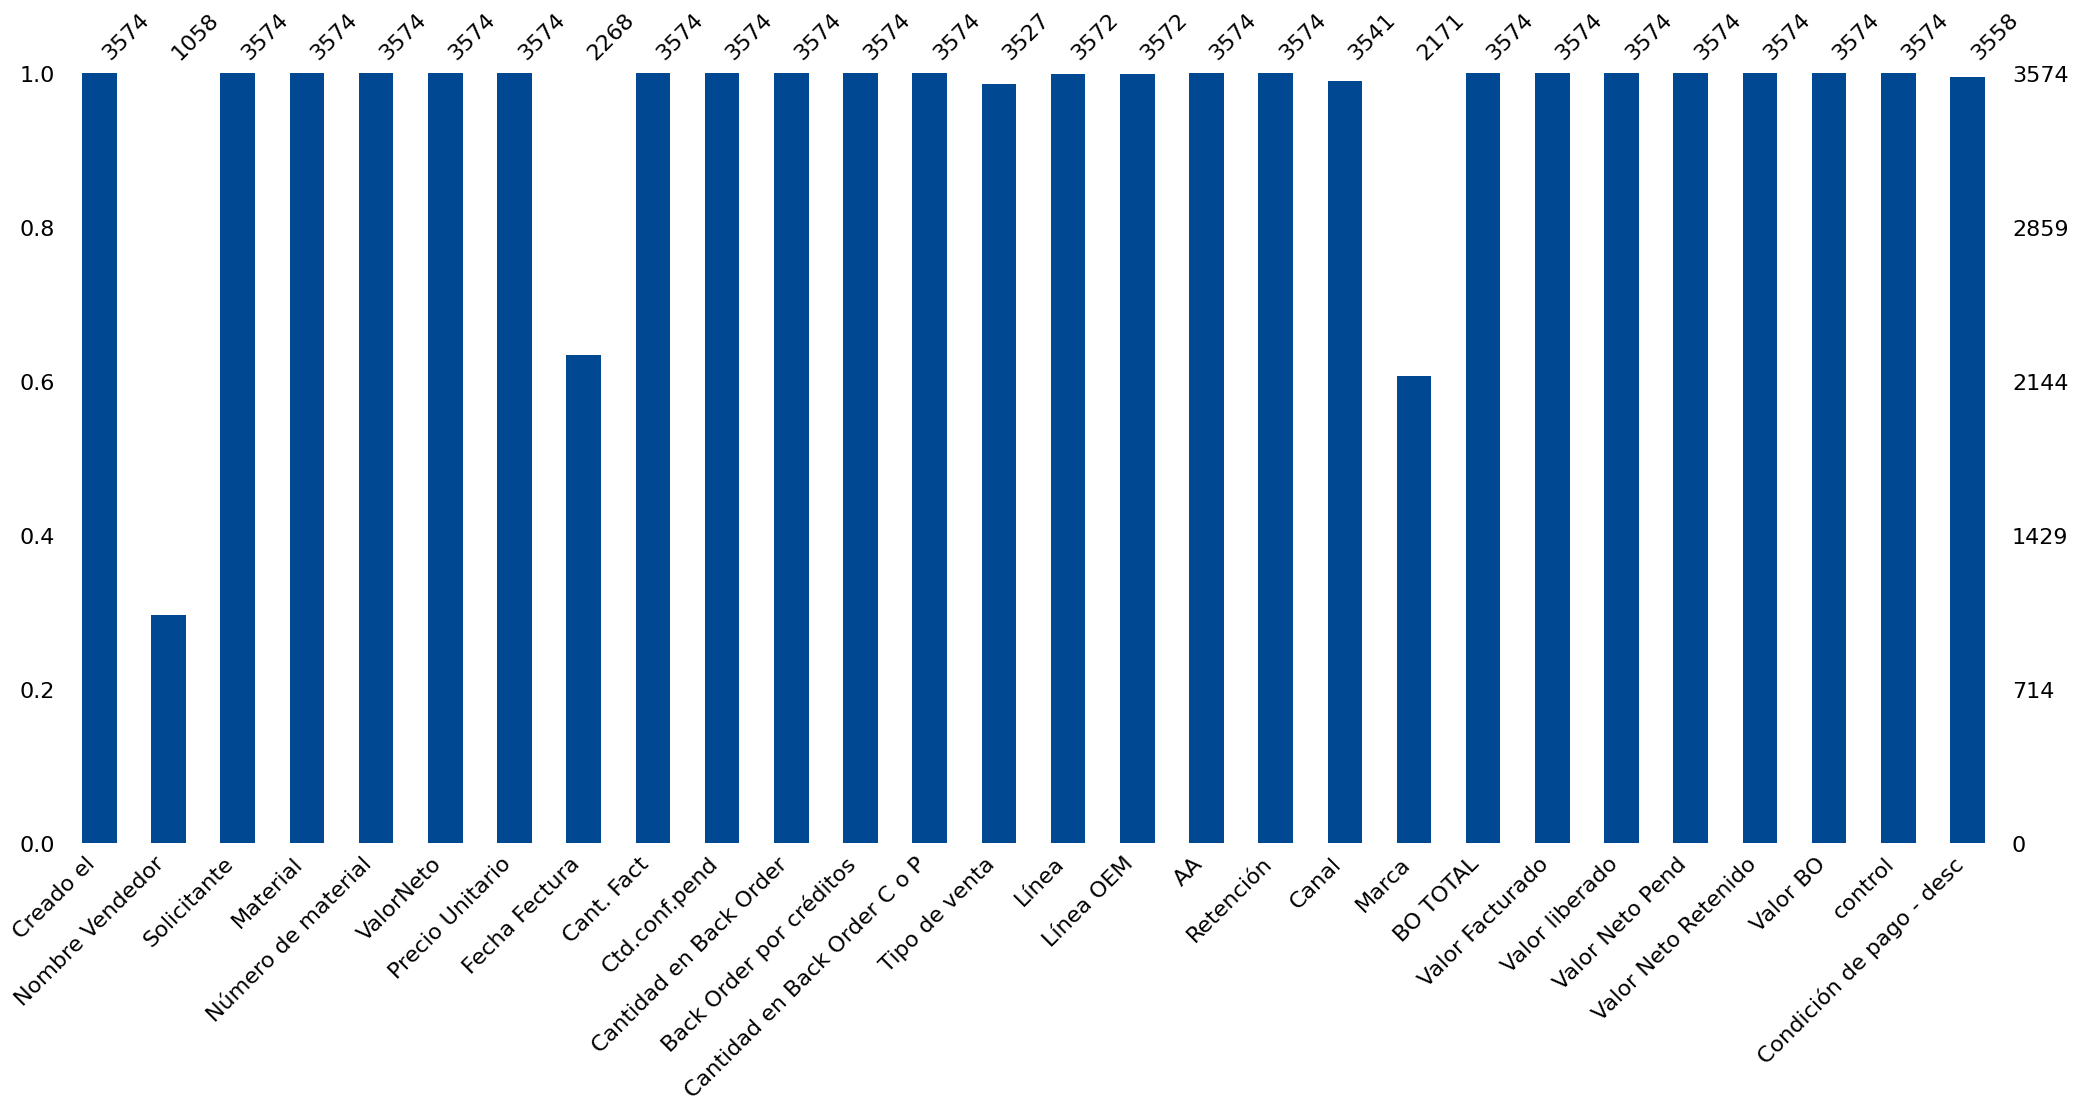

In [7]:
msn.bar(ventas_filtradas,color="#004892")

**Conclusión:** 

<span style="color:green">Como puede observarse, la mayoría de las columnas de interés tienen valores válidos, a excepción de las columnas **'Marca'**, **'Fecha Facturada'** y **'Nombre del Vendedor'**, que son las que presentan la mayor cantidad de valores no válidos.</span>

**Evaluación de Cantidades**

Ahora realizaremos una prueba de dos condiciones con respecto a las columnas de cantidades:

1. La primera condición es que no debe existir ningún registro que contenga el valor **0** en las cinco columnas, ya que esto no tendría sentido; sería un registro que no refleja ninguna transacción de ventas.

2. La segunda condición es observar si, para un registro, hay un valor distinto de **0** en más de una de estas cinco columnas.

In [8]:
# Columnas a verificar
columnas_check = [
    'Back Order por créditos',
    'Cantidad en Back Order',
    'Cantidad en Back Order C o P',
    'Cant. Fact',
    'Ctd.conf.pend'
]

# 1. Verifico si hay algún registro donde todas las columnas son cero
hay_registros_ceros = (ventas_filtradas[columnas_check] == 0).all(axis=1).any()

# 2. Verifico que si hay un valor distinto de cero, los demás deben ser cero
cumple_condicion = (
    (ventas_filtradas[columnas_check] == 0).all(axis=1) |  # Todos ceros en la fila
    (ventas_filtradas[columnas_check].sum(axis=1) == 1)  # Solo un valor distinto de 0 en la fila
)

# Combino ambas condiciones para verificar el resultado
condicion_total = cumple_condicion.all()  # Debe ser True si todas las filas cumplen la condición

# Resultados
if hay_registros_ceros:
    print("Hay registros donde las 5 columnas tienen solo valores de 0.")
else:
    print("No hay registros donde las 5 columnas tienen solo valores de 0.")

if not condicion_total:
    print("Para algún registro existen valores distintos de 0 en dos o más columnas.")
else:
    print("Todas las condiciones se cumplen en el DataFrame.")


No hay registros donde las 5 columnas tienen solo valores de 0.
Para algún registro existen valores distintos de 0 en dos o más columnas.


**Conclusión:** 

<span style="color:green">Para reflejar la cantidad total de unidades vendidas, debemos sumar las cinco columnas, ya que estas representan las cantidades. Es posible que una transacción tenga más de un estado en estas cinco descripciones de tipo de transacción. Esto puede ocurrir porque un cliente compró una cantidad determinada de productos, y parte de estos productos fueron liberados mientras que otros fueron registrados como **BO** (Back Order) por alguna razón, como falta de stock.</span>

**Conclusión General del Análisis de Integridad de las Bases de Datos de BGH**

El análisis realizado sobre las bases de datos proporcionadas por BGH ha permitido identificar y evaluar la integridad y la calidad de los datos, aspectos cruciales para asegurar la fiabilidad de cualquier análisis posterior en Power BI. A continuación, se resumen los hallazgos más relevantes:

1. **Filtrado de Ventas Diarias**: Al eliminar registros con valores de '-' en la columna de aires acondicionados, se garantiza que los datos utilizados en el análisis sean representativos y válidos. Este filtrado es esencial para evitar distorsiones en la comparación entre ventas diarias y proyecciones.

2. **Comparación de Productos**: Se observó que solo el 32% de los productos vendidos tienen una proyección asociada en la base de datos de pronósticos. Esta limitación sugiere que no todos los productos en venta pueden ser analizados en relación con sus proyecciones, lo que podría afectar la evaluación del rendimiento y la toma de decisiones.

3. **Coincidencias de Clientes y Acuerdos**: El análisis de las coincidencias entre clientes en las ventas diarias y aquellos con acuerdos comerciales reveló que apenas el 1.22% de los registros de ventas se alinean con los acuerdos existentes. Este bajo porcentaje indica una posible falta de alineación entre las ventas reales y las estrategias comerciales implementadas, lo que puede limitar la efectividad de las negociaciones y acuerdos comerciales.

4. **Intervalo de Tiempo**: La inclusión de datos de ventas de dos años permite una comparación temporal significativa. Esta perspectiva es valiosa para evaluar tendencias de ventas y comportamientos del mercado en relación con las proyecciones.

5. **Calidad de los Datos**: La evaluación de la cantidad de valores válidos e inválidos reveló que, aunque la mayoría de las columnas relevantes presentan datos válidos, existen inconsistencias en columnas clave como 'Marca', 'Fecha Facturada' y 'Nombre del Vendedor'. Estas inconsistencias deben ser atendidas antes de proceder con el análisis para asegurar la precisión de los informes generados en Power BI.

6. **Condiciones de Cantidades**: La revisión de las columnas de cantidades mostró la necesidad de eliminar registros con valores cero en todas ellas, así como la relevancia de considerar registros que reflejen múltiples estados de transacción. Esto es crucial para una correcta representación de las ventas totales.

**Recomendaciones**: 

- **Limpieza de Datos**: Se sugiere realizar una limpieza adicional de los datos para abordar las inconsistencias identificadas, especialmente en las columnas con mayor cantidad de valores no válidos.

- **Ampliación de Proyecciones**: Considerar la posibilidad de ajustar las proyecciones para incluir una mayor variedad de productos, asegurando que todos los artículos relevantes se analicen en el contexto de sus proyecciones.

- **Monitoreo Continuo**: Implementar un monitoreo regular de la calidad de los datos y las discrepancias entre ventas y proyecciones para facilitar ajustes rápidos y mejorar la alineación entre la realidad del mercado y las expectativas comerciales.